# Decision Tree Algorithm

In [1]:
import pandas as pd
df=pd.read_csv("files/Book1.csv")
df.head()

,company,job,degree,salary_more_than_100k
0,google,sale executive,bachelors,0
1,google,sale executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [2]:
input = df.drop('salary_more_than_100k',axis='columns')
target = df['salary_more_than_100k']


In [3]:
target.head()

0    0
1    0
2    1
3    1
4    0
Name: salary_more_than_100k, dtype: int64

In [4]:
input.head()

,company,job,degree
0,google,sale executive,bachelors
1,google,sale executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors


In the above input dataframe the company,job,degree are words or strings , a ML algorithms can not train this , we want to convert it into numbers so we want to use encoding.

In [5]:
from sklearn.preprocessing import LabelEncoder


In [6]:
# i want to create 3 objects for these 3 features.
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [7]:
input['company_n'] = le_company.fit_transform(input['company'])
input['job_n'] = le_job.fit_transform(input['job'])
input['degree_n'] = le_degree.fit_transform(input['degree'])

In [12]:
input

,company,job,degree,company_n,job_n,degree_n
0,google,sale executive,bachelors,2,2,0
1,google,sale executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sale executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


Now i'm going to drop my company,job and degree columns from this dataframe

In [8]:
input_n = input.drop(['company','job','degree'],axis='columns')
input_n


,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [9]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [10]:
model.fit(input_n,target)

DecisionTreeClassifier()

In [11]:
model.score(input_n,target)

1.0

Now i got the score value is one , since i passed my own trained dataset to see the score. if you work with a big dataset you won't may get the value one. it will be less than one.

In [12]:
model.predict([[2,0,0]])

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

The output is like google,business manager and with bachlor degree will get above 100k salary.

In [13]:
model.predict([[2,1,0]])

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

in google a computer programmer with bachlor degree will not get salary more than 100k

### Example 2

In [16]:
import pandas as pd
df=pd.read_csv("files/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Here survived is my target variable

In [21]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],inplace=True,axis='columns')
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


i just removed some of the features are not relevent in our predictions.

In [22]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [23]:
target = df.Survived
input = df.drop('Survived',axis='columns')

Now i splittd my output or target feature and others into different dataframe.

In [24]:
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [25]:
input.head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


Now i want to change my Sex column into Numerical values 1 and 2.Here i using map function

In [26]:
input['Sex'] = input.Sex.map({'male':1,'female':2})

In [27]:
input

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,2,38.0,71.2833
2,3,2,26.0,7.9250
3,1,2,35.0,53.1000
4,3,1,35.0,8.0500
...,...,...,...,...
886,2,1,27.0,13.0000
887,1,2,19.0,30.0000
888,3,2,NaN,23.4500
889,1,1,26.0,30.0000


Now we can see that in Age column there is some NAN values we want to remove the null values.

In [28]:
input.Age = input.Age.fillna(input.Age.mean())

In [29]:
input

,Pclass,Sex,Age,Fare
0,3,1,22.000000,7.2500
1,1,2,38.000000,71.2833
2,3,2,26.000000,7.9250
3,1,2,35.000000,53.1000
4,3,1,35.000000,8.0500
...,...,...,...,...
886,2,1,27.000000,13.0000
887,1,2,19.000000,30.0000
888,3,2,29.699118,23.4500
889,1,1,26.000000,30.0000


Now my Age columns null values are filled by Age column's mean value.

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train,X_test,Y_train,Y_test = train_test_split(input,target,test_size=0.2)

In [33]:
len(X_train)

712

In [34]:
len(X_test)

179

In [36]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [37]:
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [40]:
model.score(X_test,Y_test)

0.8435754189944135

In [41]:
model.predict([[3,1,22,7.25]])

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

# Random Forest Classifier

In [43]:
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()

In [44]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

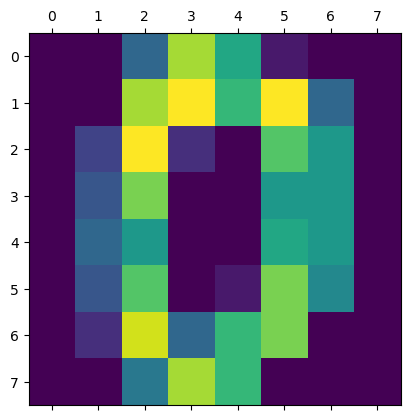

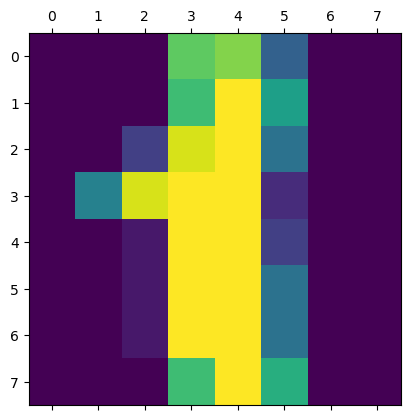

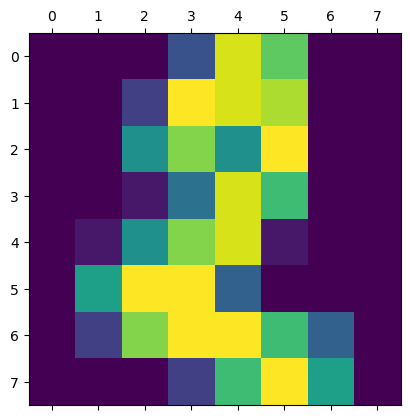

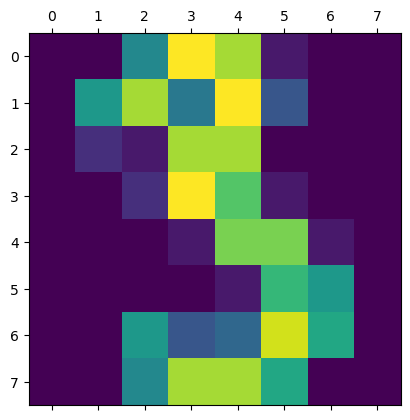

In [46]:
import matplotlib.pyplot as plt
for i in range(4):
    plt.matshow(digits.images[i])

In [47]:
digits.data[:5]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

In [49]:
df = pd.DataFrame(digits.data)
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [51]:
df['target'] = digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(df.drop(['target'],axis='columns'),digits.target,test_size=0.2)

In [53]:
len(X_train)

1437

In [54]:
len(X_test)

360

In [56]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [57]:
model.fit(X_train,Y_train)

RandomForestClassifier()

In [58]:
model.score(X_test,Y_test)

0.9888888888888889

if i change hyperparameter techniques like n_estimators 

In [65]:
model2=RandomForestClassifier(n_estimators=5)
model2.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=5)

In [66]:
#That means for this randomforest classifier we used 30 decision tree.
model2.score(X_test,Y_test)

0.9222222222222223

The default value of the n_estimators is 10. I changed it into 5 then my score will decreased.That means now i used 5 decision tree to make prediciton in this random forest classifier

In [68]:
from sklearn.metrics import confusion_matrix
predicted =model2.predict(X_test)

In [72]:
cm=confusion_matrix(Y_test,predicted)
cm

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 45,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 34,  0,  0,  0,  0,  0,  1,  0],
       [ 2,  1,  0, 43,  0,  1,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 32,  0,  0,  0,  0,  0],
       [ 1,  0,  1,  2,  1, 34,  0,  0,  0,  1],
       [ 1,  0,  0,  0,  0,  0, 33,  0,  0,  0],
       [ 1,  1,  0,  0,  1,  0,  0, 31,  0,  0],
       [ 1,  3,  1,  0,  1,  0,  0,  0, 27,  0],
       [ 0,  1,  0,  1,  1,  2,  0,  0,  0, 26]], dtype=int64)

Text(50.722222222222214, 0.5, 'True')

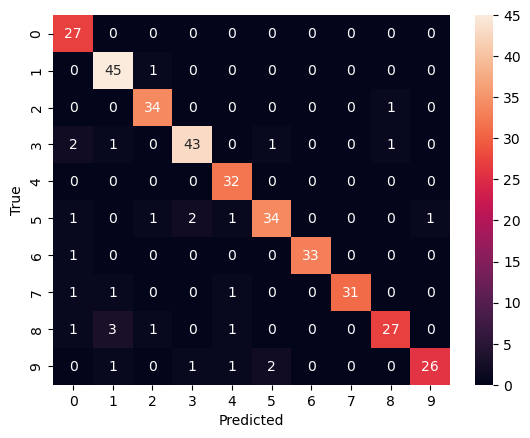

In [74]:
import seaborn as sns
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("True")

#### Example 2

In [75]:
from sklearn.datasets import load_iris

In [80]:
iris = load_iris()


In [79]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [82]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [83]:
df['target'] = iris.target

In [84]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [108]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(df.drop('target',axis='columns'),iris.target,test_size=0.2)

In [87]:
len(X_train)

120

In [88]:
len(X_test)

30

In [102]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [103]:
model.fit(X_train,Y_train)

RandomForestClassifier()

In [104]:
model.score(X_test,Y_test)

0.9666666666666667

In [114]:
predicted= model.predict(X_test)

In [115]:
cm=confusion_matrix(Y_test,predicted)
cm

array([[15,  0,  0],
       [ 0,  7,  0],
       [ 0,  0,  8]], dtype=int64)

Text(50.722222222222214, 0.5, 'Truth')

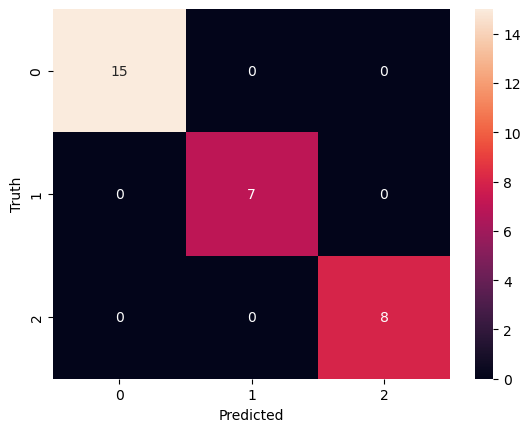

In [116]:
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

I got 0.96 accuracy when i use 10 decision tree ,that is because the default value of the n_estimators=10

In [106]:
model2 = RandomForestClassifier(n_estimators=40)
model2.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=40)

In [109]:
model2.score(X_test,Y_test)

1.0

Now i got one as model score, since it is a small dataset . However i use here 40 decision tree to make prediction so my varience error is very low.

In [110]:
predicted2 = model2.predict(X_test)

In [111]:
cm=confusion_matrix(Y_test,predicted2)
cm

array([[15,  0,  0],
       [ 0,  7,  0],
       [ 0,  0,  8]], dtype=int64)

Text(50.722222222222214, 0.5, 'Truth')

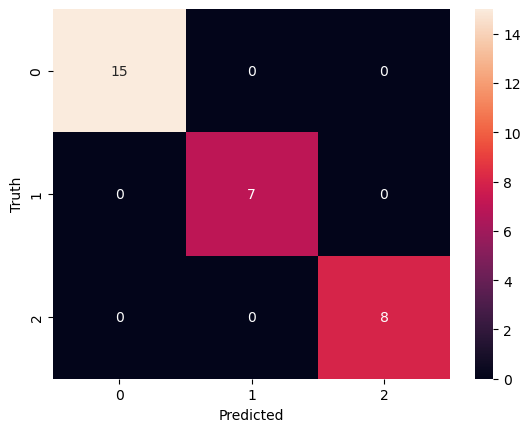

In [112]:
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")


# Support Vector Machine

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

ie, 'setosa' refers to 0 , 'versicolor' refers to 1 and 'virginica' refers to 2.

In [10]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


from 50 index onwards , it will be the versicolor.


In [11]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


from 100 onwards , it will be the virginica.

In [13]:
df['flower_names'] = df.target.apply(lambda x: iris.target_names[x])


In [14]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [15]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


For checking i divide my dataframe into 3 .

In [17]:
df0=df[df.target==0]
df1=df[df.target==1]
df2 = df[df.target==2]

In [22]:
df1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_names
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


Text(0, 0.5, 'sepal width (cm)')

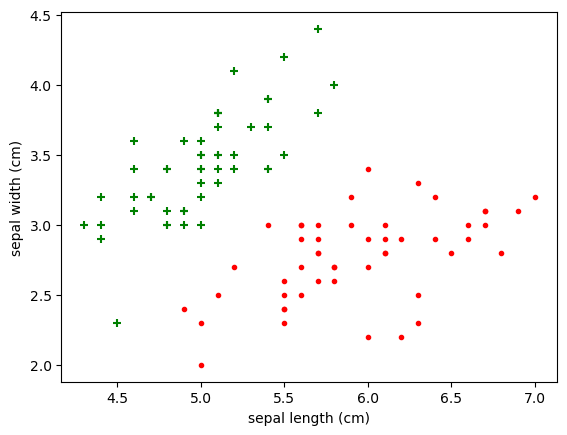

In [27]:
import matplotlib.pyplot as plt
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color="green",marker="+")
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color="red",marker=".")
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")

Text(0, 0.5, 'petal width (cm)')

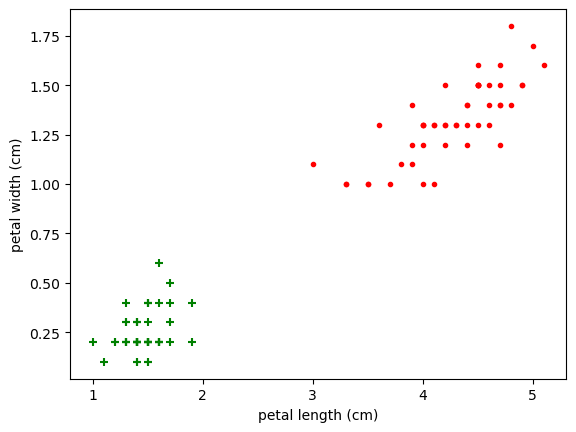

In [28]:
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color="green",marker="+")
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color="red",marker=".")
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")

In [29]:
from sklearn.model_selection import train_test_split

In [37]:
X =df.drop(['target','flower_names'],axis='columns')
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [35]:
Y =df.target

In [38]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [39]:
len(X_train)

120

In [40]:
len(X_test)

30

In [75]:
from sklearn.svm import SVC
model = SVC()

In [43]:
model.fit(X_train,Y_train)

SVC()

In [44]:
model.score(X_test,Y_test)

1.0

its pritty good, we can see from the accuracy of the model.

In [47]:
model2 = SVC(kernel='linear')
model2.fit(X_train,Y_train)

SVC(kernel='linear')

In [48]:
model.score(X_test,Y_test)

1.0

### Example 2

In [50]:
from sklearn.datasets import load_digits
digits = load_digits()

In [51]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [53]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [59]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [60]:
df = pd.DataFrame(digits.data,digits.target)

In [61]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [63]:
df['target'] = digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(df.drop('target',axis='columns'),df.target,test_size=0.2)

In [66]:
len(X_train)

1437

In [67]:
len(X_test)

360

In [68]:
rbf_model = SVC(kernel='rbf')

In [69]:
rbf_model.fit(X_train,Y_train)

SVC()

In [70]:
rbf_model.score(X_test,Y_test)

0.9916666666666667

In [ ]:
from sklearn

##### using linear kernel

In [72]:
linear_model = SVC(kernel='linear')
linear_model.fit(X_train,Y_train)

SVC(kernel='linear')

In [73]:
linear_model.score(X_test,Y_test)

0.9833333333333333

#### In this sceenario the rbf kernel is better than the linear kernel

#### Cross validation Score

In [78]:
from sklearn.model_selection import cross_val_score
from sklearn import svm

In [83]:
cross_val_score(svm.SVC(kernel='rbf',C=10,gamma='auto'),iris.data,iris.target,cv=5)

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [84]:
cross_val_score(svm.SVC(kernel='linear',C=10,gamma='auto'),iris.data,iris.target,cv=5)

array([1.        , 1.        , 0.9       , 0.96666667, 1.        ])

In [85]:
cross_val_score(svm.SVC(kernel='linear',C=20,gamma='auto'),iris.data,iris.target,cv=5)

array([1.        , 1.        , 0.9       , 0.93333333, 1.        ])

By calculating the average of the scores you will get the accurate score.We can also use for loops .

In [88]:
import numpy as np
Kernels = ['rbf','linear']
C=[1,10,20]
avg_scores = {}
for kval in Kernels:
    for Cval in C:
        cv_scores = cross_val_score(svm.SVC(kernel=kval,C=Cval,gamma='auto'),iris.data,iris.target,cv=5)
        avg_scores[kval +' '+str(Cval)]=np.average(cv_scores)
        
avg_scores

{'rbf 1': 0.9800000000000001,
 'rbf 10': 0.9800000000000001,
 'rbf 20': 0.9666666666666668,
 'linear 1': 0.9800000000000001,
 'linear 10': 0.9733333333333334,
 'linear 20': 0.9666666666666666}

This way i can calcualte the best model using hyperparameter tuning .But it's code is long.Hence we use a class called GridsearchCV

#### GridSearchCV

In [93]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(svm.SVC(gamma='auto'),{
    'C':[1,10,20],
    'kernel':['linear','rbf']
},cv=5,return_train_score=False)
clf.fit(iris.data,iris.target)

GridSearchCV(cv=5, estimator=SVC(gamma='auto'),
             param_grid={'C': [1, 10, 20], 'kernel': ['linear', 'rbf']})

In [94]:
clf.cv_results_

{'mean_fit_time': array([0.00099745, 0.0009964 , 0.00119839, 0.00107703, 0.00098753,
        0.00099716]),
 'std_fit_time': array([6.30452636e-04, 1.13242551e-06, 3.97169935e-04, 7.64308857e-04,
        5.37305285e-04, 1.17383324e-06]),
 'mean_score_time': array([0.00059762, 0.0007977 , 0.00019927, 0.00061493, 0.0005374 ,
        0.00039868]),
 'std_score_time': array([0.00048795, 0.00039886, 0.00039854, 0.00050287, 0.00066246,
        0.00048829]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['linear', 'rbf', 'linear', 'rbf', 'linear', 'rbf'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'linear'},
  {'C': 1, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 20, 'kernel': 'linear'},
  {'C':

In [97]:
import pandas as pd
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000997,0.000630,0.000598,0.000488,1,linear,"{'C': 1, 'kernel': 'linear'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
1,0.000996,0.000001,0.000798,0.000399,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
2,0.001198,0.000397,0.000199,0.000399,10,linear,"{'C': 10, 'kernel': 'linear'}",1.000000,1.0,0.900000,0.966667,1.0,0.973333,0.038873,4
3,0.001077,0.000764,0.000615,0.000503,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
4,0.000988,0.000537,0.000537,0.000662,20,linear,"{'C': 20, 'kernel': 'linear'}",1.000000,1.0,0.900000,0.933333,1.0,0.966667,0.042164,6
5,0.000997,0.000001,0.000399,0.000488,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.966667,1.0,0.900000,0.966667,1.0,0.966667,0.036515,5


In [99]:
df[['param_C','param_kernel','mean_test_score']]


,param_C,param_kernel,mean_test_score
0,1,linear,0.980000
1,1,rbf,0.980000
2,10,linear,0.973333
3,10,rbf,0.980000
4,20,linear,0.966667
5,20,rbf,0.966667


In [100]:
dir(clf)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run_search',
 '_select_best_index',
 '_validate_data',
 '_validate_params',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'fit',
 'get_params',
 'inverse_transform',
 'multimetric_',
 'n_fe

In [101]:
clf.best_score_

0.9800000000000001

In [102]:
clf.best_params_

{'C': 1, 'kernel': 'linear'}

The limitation of our GridsearchCV is that when our value of C is large . Then the computation cost is high.Hence we use RandomizedSearchCV .which will select randomlly the regulariszation parameter.

In [115]:
from sklearn.model_selection import RandomizedSearchCV
clf = RandomizedSearchCV(svm.SVC(gamma='auto'),{
    'C':[1,10,20],
    'kernel':['rbf','linear']
},cv=5,return_train_score=False,n_iter=2)
clf.fit(iris.data,iris.target)
clf.cv_results_

{'mean_fit_time': array([0.00128174, 0.00096765]),
 'std_fit_time': array([0.00039508, 0.00060809]),
 'mean_score_time': array([0.00059915, 0.00059862]),
 'std_score_time': array([0.0004892 , 0.00048878]),
 'param_kernel': masked_array(data=['rbf', 'rbf'],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_C': masked_array(data=[10, 1],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'kernel': 'rbf', 'C': 10}, {'kernel': 'rbf', 'C': 1}],
 'split0_test_score': array([0.96666667, 0.96666667]),
 'split1_test_score': array([1., 1.]),
 'split2_test_score': array([0.96666667, 0.96666667]),
 'split3_test_score': array([0.96666667, 0.96666667]),
 'split4_test_score': array([1., 1.]),
 'mean_test_score': array([0.98, 0.98]),
 'std_test_score': array([0.01632993, 0.01632993]),
 'rank_test_score': array([1, 1])}

In [116]:
df = pd.DataFrame(clf.cv_results_)
df[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,10,rbf,0.98
1,1,rbf,0.98


by using n_iter attribute it will print only the scores that we want even the regularization parameter C will range from 1 to high values.The output will change if run again .Because it is seleted by randomlly.

#### How we choose a best model for a specific algorithms

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

In [ ]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}

In [ ]:

scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(iris.data, iris.target)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df